# Introduction to NetworkX and Graphs
Welcome to this Jupyter Notebook introduction to NetworkX and graphs! In this notebook, we'll explore the basics of NetworkX, a Python library for the creation, manipulation, and study of complex networks or graphs. Graphs are mathematical structures used to model relationships between entities.

## What is a Graph?
A graph is a collection of nodes (also called vertices) and edges that connect pairs of nodes. Nodes represent entities, while edges represent relationships between these entities.

## Graphs are used to model various real-world scenarios:

Social networks: Nodes represent individuals, and edges represent friendships or interactions.


Transportation networks: Nodes represent locations, and edges represent roads or connections between locations.


Computer networks: Nodes represent computers or devices, and edges represent connections or communication links.


## NetworkX

NetworkX is a powerful Python library for working with graphs. It provides tools for creating, analyzing, and visualizing graphs. Let's start by installing NetworkX if you haven't already:

In [ ]:
pip install networkx


Now, let's import NetworkX and get started!

## Creating Graphs
We can create a graph in NetworkX using the Graph class. Let's create a simple undirected graph:



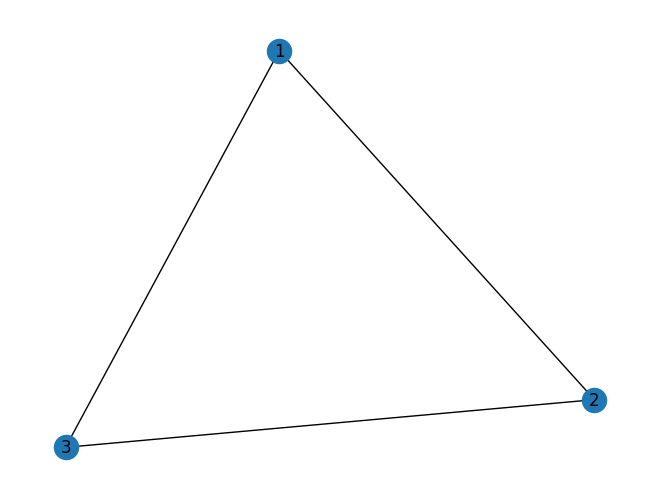

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3])

# Add edges
G.add_edge(1, 2)
G.add_edges_from([(1, 3), (2, 3)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In this example, we created a graph G, added nodes 1, 2, and 3, and added edges connecting these nodes.

# Basic Operations
NetworkX provides various functions for basic graph operations:

nodes(): Get the nodes of the graph.

edges(): Get the edges of the graph.

neighbors(node): Get the neighbors of a node.

degree(node): Get the degree of a node (number of edges incident to the node).

Let's demonstrate these operations:

In [14]:
# Get nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Get neighbors and degree of a node
print("Neighbors of node 1:", list(G.neighbors(1)))
print("Degree of node 1:", G.degree(1))

Nodes: [1, 2, 3]
Edges: [(1, 2), (1, 3), (2, 3)]
Neighbors of node 1: [2, 3]
Degree of node 1: 2


## Graph Visualization

NetworkX provides basic visualization capabilities, but for more advanced visualizations, we often use Matplotlib or other libraries. Let's visualize the graph we created earlier:

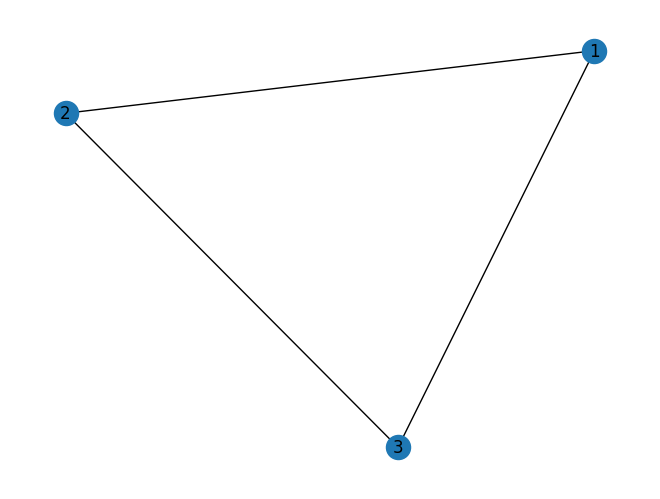

In [15]:
# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

## Adjacency matrix of a graph
The adjacency matrix is a square matrix used to represent a graph. In the context of a graph with \( n \) nodes, the adjacency matrix is an \( n \times n \) matrix where each row and column corresponds to a node in the graph. 

The elements of the adjacency matrix indicate whether there is an edge between two nodes. Typically, if there is an edge from node \( i \) to node \( j \), the corresponding entry in the adjacency matrix will be 1; otherwise, it will be 0.

### Example


In [16]:

import numpy as np

# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

print("Adjacency Matrix:")
print(adj_matrix)


Adjacency Matrix:
[[0 1 1]
 [1 0 1]
 [1 1 0]]


C:\Users\musta\AppData\Local\Temp\ipykernel_118520\2543073680.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G).todense()



# Introduction to PageRank

PageRank is an algorithm used by search engines like Google to rank web pages in their search engine results. It was developed by Larry Page and Sergey Brin, the founders of Google, while they were students at Stanford University.

## Background

Before PageRank, search engines primarily ranked web pages based on the number of times a query term appeared on a page and its proximity to the beginning of the page. However, this approach could be manipulated by webmasters through techniques like keyword stuffing.

PageRank revolutionized web search by considering the link structure of the web. The underlying idea is that a web page is important if it is pointed to by other important pages. 

## How PageRank Works

PageRank assigns a numerical weight to each element of a hyperlinked set of web pages, with the purpose of measuring its relative importance within the set. The algorithm works as follows:

1. **Initialization**: Initially, all pages are assigned an equal initial rank value.

2. **Iterative Calculation**: PageRank is calculated iteratively using the following formula:

   $ PR(u) = \frac{(1 - d)}{N} + d \times \sum_{v \in B(u)} \frac{PR(v)}{L(v)} $
   
   where:
   - $ PR(u) $ is the PageRank of page $u$,
   - $ d $ is a damping factor (usually set to 0.85),
   - $ N $ is the total number of pages,
   - $ B(u) $ is the set of pages that link to page $ u $,
   - $ L(v) $ is the number of outbound links on page $ v $.

3. **Convergence**: The iteration continues until the PageRank values converge (i.e., stabilize) or a specified number of iterations is reached.

4. **Normalization**: Finally, the PageRank values are normalized so that they sum up to 1.

## Importance

PageRank revolutionized web search by considering the link structure of the web. It provided a more robust and reliable way of ranking web pages, making search results more relevant and less susceptible to manipulation.

## Applications

Beyond web search, PageRank has found applications in various other fields such as social network analysis, recommendation systems, citation analysis, and more. It is a fundamental algorithm in network analysis and has paved the way for many subsequent advancements in the field.


## Minimal implementation for PageRank

In [9]:
import numpy as np

def pagerank(adj_matrix, d=0.85, max_iter=100, tol=1e-6):
    """
    Calculate PageRank scores using the PageRank algorithm.
    
    Parameters:
        adj_matrix (numpy.ndarray): The adjacency matrix representing the graph.
        d (float): Damping factor, typically set to 0.85.
        max_iter (int): Maximum number of iterations.
        tol (float): Tolerance to determine convergence.
        
    Returns:
        numpy.ndarray: PageRank scores for each node.
    """
    N = adj_matrix.shape[0]
    pr = np.ones(N) / N  # Initialize PageRank scores
    adj_matrix_norm = adj_matrix / adj_matrix.sum(axis=0)  # Normalize adjacency matrix
    
    for _ in range(max_iter):
        pr_new = (1 - d) / N + d * np.dot(adj_matrix_norm, pr)  # Update PageRank scores
        if np.linalg.norm(pr_new - pr, ord=1) < tol:
            break
        pr = pr_new
    
    return pr

# Example usage:
adj_matrix = np.array([[0, 1, 0], [1, 0, 1], [1, 0, 0]])
pagerank_scores = pagerank(adj_matrix)
print("PageRank Scores:", pagerank_scores)


PageRank Scores: [0.38778953 0.3973997  0.21481077]


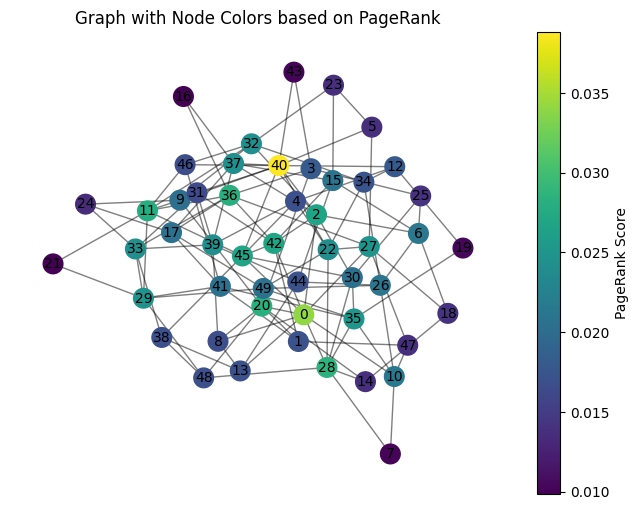

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph with 50 nodes
G = nx.gnp_random_graph(50, 0.1, seed=42)

# Calculate PageRank scores
pagerank_scores = nx.pagerank(G)

# Draw the graph with node colors based on PageRank scores
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes

# Draw nodes
nodes = nx.draw_networkx_nodes(G, pos, node_color=list(pagerank_scores.values()), cmap=plt.cm.viridis, node_size=200)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Add color bar
plt.colorbar(nodes, label="PageRank Score")

# Show plot
plt.title("Graph with Node Colors based on PageRank")
plt.axis('off')
plt.show()
